### Арапов Степан , М8О-208б-19
### Системы аналитических вычислений.Лабораторная работа №2
#### Первая часть
вариант A:<br>
1)Реализовать в виде функций методы дихотомии и Ньютона <br>
2)Реализовать ползунки для перебора значений входных параметров<br>
3)Сделать вывод 6 кадров нахождения решения (оформить через массив графиков)<br>
4)Ответ сравнить с ответом, который даёт функция solve<br>

Для начала зададим нашу функцию и постороим её график

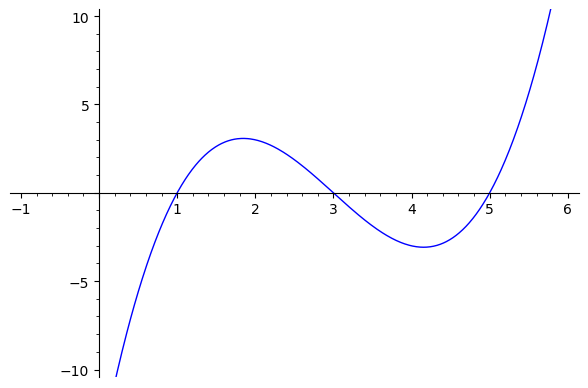

In [24]:
y(x) = x^3 - 9*x^2 + 23*x - 15
plot(y, ymax=10, ymin=-10, xmax=6, xmin=-1)

In [25]:
show(y(x))

x^3 - 9*x^2 + 23*x - 15

Как видно, это обычный многочлен третьей степени, корнями которого являются числа 1, 3 и 5.<br>
Определим теперь функции для метода Ньютона и дихотомии. 

In [26]:
def newton(f, a, b, EPS, view=False):
    x1 = a
    x2 = (a + b) / 2
    df = f.derivative()
    draws = []
    picture = plot(y, ymax=3, ymin=-3, xmax=6, xmin=0)
    while abs(x2 - x1) >= EPS:
        x1 = x2
        x2 = x1 - f(x=x1)/df(x=x1)
        if view:
            draws.append(picture + point((x1,y(x1)), color='orange', size=50, zorder=5))
    if view:
        return x1,draws    
    return x1

def dichotomy(f, a, b, EPS, view=False):
    x1 = a
    x2 = b
    x = (x1+x2)/2
    draws = []
    picture = plot(y, ymax=3, ymin=-3, xmax=6, xmin=0)
    while abs(x2 - x1) >= EPS:
        x = (x1+x2)/2
        if f(x1)*f(x) >0:
            x1 = x
        else:
            x2 = x
        if view:
            draws.append(picture + point((x,y(x)), color='orange',size=50,zorder=5))
    if view:
        return x, draws
    return x

Проверим наши функции на некоторых интервалах

In [27]:
newton(y, -10, 1.1, 0.05), newton(y, 2, 3.9, 0.05), newton(y, 3.27, 100, 0.05)

(0.978682130214405, 3.00006261740764, 5.00741107246200)

In [28]:
dichotomy(y, -10, 1.1, 0.05), dichotomy(y, 2, 3.9, 0.05), dichotomy(y, 3.27, 100, 0.05)

(0.969921875000000, 2.97968750000000, 5.01756347656250)

Визуализация:<br>
Метод Ньютона

In [29]:
@interact
def _(a=(0, 6, 0.25), b=(0, 6, 0.25)):
    x, draws = newton(y, a, b, EPS=1e-5, view=True)
    graphics_array([draws],nrows=3,ncols=2).show()
    print('x = ', x)

Interactive function <function _ at 0x6ffebe1f0170> with 2 widgets
  a: FloatSlider(value=3.0, description='a'…

Дихотомия

In [30]:
@interact
def _(a=(0, 6, 0.25), b=(0, 6, 0.25)):
    x, draws = dichotomy(y, a, b, EPS=1e-5, view=True)
    graphics_array([draws], nrows=3, ncols=2).show()
    print('x = ', x)

Interactive function <function _ at 0x6ffec0c119e0> with 2 widgets
  a: FloatSlider(value=3.0, description='a'…

Теперь сравним наш результат с тем, который даёт стандартная функция solve()

In [31]:
solve(y, x)

[x == 1, x == 5, x == 3]

В приближении до эпсилон наши функции дают такой же ответ

#### Вторая часть
1)Реализовать расширенный алгоритм Евклида <br>
2)Получить НОД, сравнить его с результатом от функции gcd() <br>
3)Получить представление НОД в виде: $f*u + v*g$ (тождество Безу)

По списку второй => вариант 2:

$f = 5*x^4 - 15*x^3 + 15*x^2 - 5*x$ <br>
$g = -22*x^5 + 33*x^4 - 11*x^3 - 99*x + 99$


Для корректной работы с полиномами нужно задать кольцо,в котором будем работать

In [32]:
R.<x> = PolynomialRing(QQ)
f = 5*x^4 - 15*x^3 + 15*x^2 -5*x
g = -22*x^5 + 33*x^4 - 11*x^3 - 99*x + 99

Какие корни у этих многочленов?

In [33]:
f.roots(), g.roots()

([(0, 1), (1, 3)], [(1, 1)])

Уже отсюда видно, что НОД $ f_x$ и $g_x$ будет $x-1$

Посмотрим на результат встроенной функции gcd()

In [34]:
res = gcd(f, g)
show(res)

x - 1

Расширенный алгоритм Евклида

In [35]:
def bezout(a, b):
    '''An implementation of extended Euclidean algorithm.
    Returns integer x, y and gcd(a, b) for Bezout equation:
        ax + by = gcd(a, b).
    '''
    x, xx, y, yy = 1, 0, 0, 1
    while b:
        q = a // b
        c = b
        b = a % c
        a = c
        # a, b = b, a % b
        x, xx = xx, x - xx*q
        y, yy = yy, y - yy*q
    return (x, y, a)

In [36]:
u, v, gcd_euclid = bezout(f, g)
show("gcd = ", gcd_euclid(x),";\t u = ", u(x), ";\t v = ", v(x))

'gcd = ' -6336/49*x + 6336/49 ';\t u = ' -352/175*x^3 - 1936/1225*x^2 + 4752/1225*x + 1584/245 ';\t v = ' -16/35*x^2 + 16/49*x + 64/49

In [37]:
u * f + v * g

-6336/49*x + 6336/49

Полученный результат совпал с НОД, найденным в начале этого пункта (домножение на константу -6336/49 ничего не меняет), значит найденные коэффициенты верны. Алгоритм работает корректно.

#### Третья часть



1. Привести поверхность, заданную уравнением, к каноническому виду.
2. Построить исходную поверхность и поверхность в каноническом виде.
3. Собственные числа и вектора рассчитать вручную, сравнить с результатом встроенных функций.

По списку 2 => Вариант 2: <br>
$f(x, y, z) = 6x^2 + 12xy + 7y^2 + 2xz + 3z^2 + 5x + 5y + 5z - 18$

In [38]:
f(x, y, z) = 6*x^2 + 12*x*y + 7*y^2 + 2*x*z + 3*z^2 + 5*x + 5*y + 5*z - 18

In [39]:
show(f)

(x, y, z) |--> 6*x^2 + 12*x*y + 7*y^2 + 2*x*z + 3*z^2 + 5*x + 5*y + 5*z - 18

Нарисуем поверхность

In [40]:
implicit_plot3d(f(x=x, y=y, z=z), (x, -10, 10), (y, -10, 10), (z, -10, 10))

Graphics3d Object

Создадим две матрицы: матрица $A$ для квадратичной формы, матрица $B$ из коэффициентов квадратичной и линейной формы и из свободного члена.

In [41]:
A = matrix([
    [6, 6, 1],
    [6, 7, 0],
    [1, 0, 3]
])

B = matrix([
    [6, 6, 1, 2.5],
    [6, 7, 0, 2.5],
    [1, 0, 3, 2.5],
    [2.5, 2.5, 2.5, -18]
])

Посчитаем ортогональные инварианты.

In [42]:
t1 = A.trace()
t2 = A[0:2, 0:2].det() + A[[0, 2], [0, 2]].det() + A[1:3, 1:3].det()
d = A.det()
delta = B.det()
print("t1 =", t1, "\nt2 =", t2, "\nd =", d, "\ndelta =", delta)

t1 = 16 
t2 = 44 
d = 11 
delta = -235.500000000000


Найдём собственные значения матрицы $А$.

In [20]:
E = matrix.identity(3)
eigenvalues = []

var("lmbda")
for eigenvalue in solve((A - lmbda * E).det() == 0, lmbda):
    show(n(eigenvalue.rhs()))
    eigenvalues.append(eigenvalue.rhs())


3.15354361582362

0.277520671882518

12.5689357122939 - 1.11022302462516e-16*I

Или другой способ:

In [21]:
A.eigenvalues()

[0.2775206718825174?, 3.153543615823624?, 12.568935712293860?]

Получили одинаковые значения,значит посчитано верно.<br>

Перейдём к последнему шагу, а именно к построениею поверхности в каноническом виде.<br>
Для начала нужно составить каноническое уравнение:

In [22]:
f_canonical(x,y,z) = x**2 * A.eigenvalues()[0] + y**2 * A.eigenvalues()[1] + z**2 * A.eigenvalues()[2]  + delta / d

Наконец изобразим:

In [23]:
implicit_plot3d(f_canonical, (x, -10, 10), (y, -10, 10), (z, -10, 10))

Graphics3d Object